In [1]:
import os
import pandas as pd
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Dropout

# constants

In [2]:
DATASET_DIR = "dataset/"
TRAIN_DIR = os.path.join(DATASET_DIR, "training/")
#TEST_DIR = os.path.join(DATASET_DIR, "asl_alphabet_test/asl_alphabet_test")

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32

CLASSES = os.listdir(TRAIN_DIR)
NUM_CLASSES = len(CLASSES)

SEED = 17

# Load Data

In [3]:
train_ds = image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 9900 files belonging to 11 classes.
Using 7920 files for training.
Found 9900 files belonging to 11 classes.
Using 1980 files for validation.


# Visualize

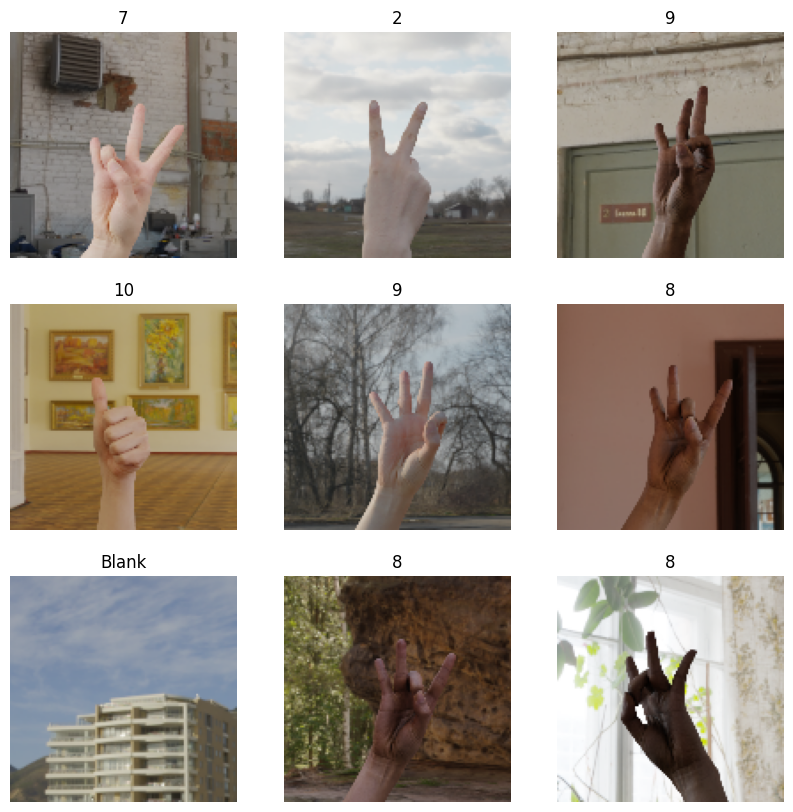

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

# Normalize Image

In [5]:
normalize = Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalize(x), y))
val_ds = val_ds.map(lambda x, y: (normalize(x), y))

# Define the CNN Achitecture

In [6]:
inputs = Input(shape=IMAGE_SIZE+(3,), batch_size=BATCH_SIZE)

# Convolutional Base
x = Conv2D(64, kernel_size=3, padding="same", activation="relu")(inputs)
x = MaxPooling2D(2)(x)

x = Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)

x = Conv2D(256, kernel_size=3, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)

#x = Conv2D(bisa diganti, kernel_size=bisa diganti, padding="same", activation="relu")(inputs)
#x = MaxPooling2D(bisa diganti)(x)

# Head (Classifier)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
#x = Dense(bisa diganti, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=x, name="ASL_CNN")

In [7]:
model.summary()

Model: "ASL_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(32, 128, 128, 3)]       0         
                                                                 
 conv2d (Conv2D)             (32, 128, 128, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 64, 64, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 64, 64, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 32, 32, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 32, 32, 256)         2951

# Compile The Model

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Train The Model

In [10]:
epochs = 5

history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=epochs,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Epoch 1/5


248/248 [==============================] - 317s 1s/step - loss: 1.7765 - accuracy: 0.3808 - val_loss: 0.3964 - val_accuracy: 0.8879
Epoch 2/5
248/248 [==============================] - 350s 1s/step - loss: 0.3558 - accuracy: 0.8943 - val_loss: 0.1612 - val_accuracy: 0.9626
Epoch 3/5
248/248 [==============================] - 324s 1s/step - loss: 0.1625 - accuracy: 0.9500 - val_loss: 0.1092 - val_accuracy: 0.9687
Epoch 4/5
248/248 [==============================] - 336s 1s/step - loss: 0.0954 - accuracy: 0.9702 - val_loss: 0.0969 - val_accuracy: 0.9788
Epoch 5/5
248/248 [==============================] - 350s 1s/step - loss: 0.0728 - accuracy: 0.9777 - val_loss: 0.0686 - val_accuracy: 0.9823


<Axes: >

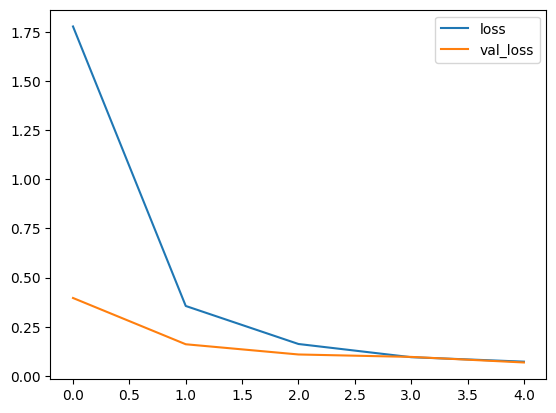

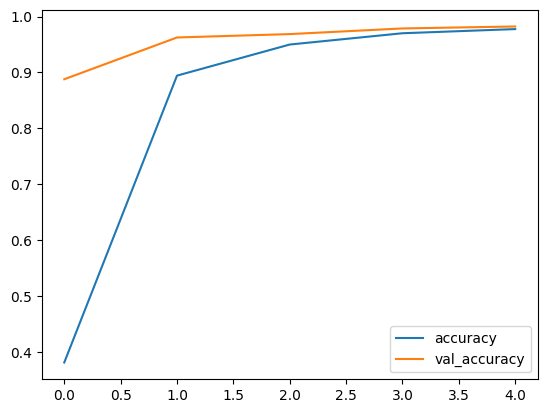

In [11]:
df = pd.DataFrame(history.history)
df.loc[:, ["loss", "val_loss"]].plot()
df.loc[:, ["accuracy", "val_accuracy"]].plot()

# df.loc[:, ["accuracy", "loss"]].plot()
# df.loc[:, ["val_accuracy", "val_loss"]].plot()

In [12]:
# # model.save('model_sibi_fix.h5')

model.save("cnn_model_25b.hdf5")
print("Model Saved")

C:\Users\yazid\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved


In [13]:
# model_json=model.to_json()
# with open("model.json", "w") as file:
#     file.write(model_json)
# model.save_weights("model.h5")
# print("SUCCES model is SAVED !")

In [14]:
# from keras.models import model_from_json
# json_file = open('model.json','r')
# loaded_model_json = json_file.read()
# json_file.close()

# load_model = model_from_json(loaded_model_json)
# load_model.load_weights("model.h5")
# print("LOADED!")

In [15]:
# import cv2
# from keras.preprocessing.image import ImageDataGenerator

# image = cv2.imread("dataset/training/D/D1.jpg")
# image = cv2.resize(image,IMAGE_SIZE)
# image = np.reshape(image,[1,64,64,3])
# prediksi = load_model.predict(image)
# #prediksi = model.predict_classes(image)
# print("Prediksinya adalah huruf ",prediksi)

In [16]:

import cv2
from keras.preprocessing.image import ImageDataGenerator

test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(
    'dataset/test/',
    target_size=(128,128),
    batch_size=32,
#     seed=SEED,
    shuffle=False
)

Found 1100 images belonging to 11 classes.


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

prediksi = model.predict_generator(test_data_generator)
y_pred = np.argmax(prediksi, axis=1)

print("==============================Confusion Matrix==============================")
print(confusion_matrix(test_data_generator.classes, y_pred))


C:\Users\yazid\AppData\Local\Temp\ipykernel_10192\3862568218.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediksi = model.predict_generator(test_data_generator)


==============================Confusion Matrix==============================
[[ 99   0   1   0   0   0   0   0   0   0   0]
 [  0  98   0   0   0   0   1   0   0   0   1]
 [  0   0  99   0   0   0   0   0   0   0   1]
 [  1   0   0  98   0   0   0   0   0   1   0]
 [  0   0   1   0  99   0   0   0   0   0   0]
 [  0   0   1   1   0  95   0   0   1   1   1]
 [  0   0   0   0   0   0 100   0   0   0   0]
 [  0   1   0   0   1   0   0  97   0   0   1]
 [  0   0   1   0   0   0   0   0  98   1   0]
 [  0   0   0   0   0   0   1   0   0  99   0]
 [  0   1   0   0   0   0   1   0   0   0  98]]


In [18]:
print("==============================Hasil==============================")
print(classification_report(test_data_generator.classes, y_pred))

==============================Hasil==============================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.98      0.98      0.98       100
           2       0.96      0.99      0.98       100
           3       0.99      0.98      0.98       100
           4       0.99      0.99      0.99       100
           5       1.00      0.95      0.97       100
           6       0.97      1.00      0.99       100
           7       1.00      0.97      0.98       100
           8       0.99      0.98      0.98       100
           9       0.97      0.99      0.98       100
          10       0.96      0.98      0.97       100

    accuracy                           0.98      1100
   macro avg       0.98      0.98      0.98      1100
weighted avg       0.98      0.98      0.98      1100



In [21]:
import string

labels = []
number = list(string.ascii_uppercase)
labels.extend(number)
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


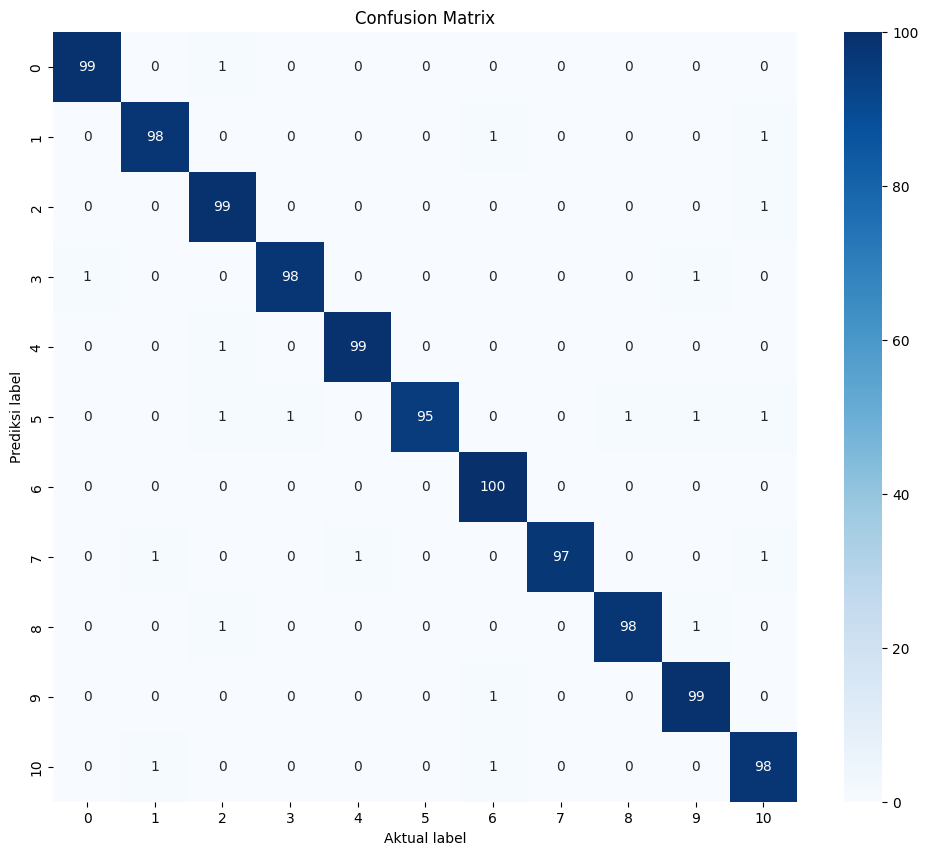

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

true_labels = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']) 
predicted_labels = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']) 

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] 

cm_df = pd.DataFrame(confusion_matrix(test_data_generator.classes, y_pred), index=class_names, columns=class_names)

f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm_df, annot=True, fmt=".0f", ax=ax, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel("Aktual label")
plt.ylabel("Prediksi label")
plt.show()

In [ ]:
58/(58+2) =

In [ ]:
# import tensorflow as tf
# import os
# import pandas as pd
# import numpy as np
# import math
# import tensorflow as tf
# print(tf.__version__)
# print(pd.__version__)
# print(np.__version__)